# Actividad 3 (Segmentación)
- Miranda Eugenia Colorado Arróniz A01737027
- Ciudad escogida: Hawaii

## Inciso e)
### K= 10, Variables = “number_of_reviews”, “calculated_host_listings_count”, “review_scores_cleanliness”, “review_scores_rating” y “host_acceptance_rate”

In [21]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
# Convertir el dataset en un dataframe
df= pd.read_csv("listings_filtrado.csv")
df

# Sustituir los valores nulos por los no nulos hacia adelante
df = df.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
df['review_scores_rating'] = df['review_scores_rating'].replace('[\%,]', '', regex=True).astype(float)


# Ahora selecciona las columnas para clustering
X = df[['number_of_reviews', 'calculated_host_listings_count', 'review_scores_cleanliness', 'review_scores_rating', 'host_acceptance_rate']].values
X

<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_37331/2581987597.py:9: SyntaxWarning: invalid escape sequence '\%'
  df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_37331/2581987597.py:10: SyntaxWarning: invalid escape sequence '\%'
  df['review_scores_rating'] = df['review_scores_rating'].replace('[\%,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_37331/2581987597.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


array([[ 40.  ,   3.  ,   4.55,   4.78,  96.  ],
       [231.  ,   2.  ,   4.42,   4.67,  96.  ],
       [  0.  ,   3.  ,   4.42,   4.67,   0.  ],
       ...,
       [  0.  ,   1.  ,   5.  ,   5.  ,  99.  ],
       [  0.  ,   1.  ,   5.  ,   5.  ,  99.  ],
       [  0.  ,  61.  ,   5.  ,   5.  ,  96.  ]], shape=(36125, 5))

In [23]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
#Aplicamos K-means con 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [25]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X)
etiquetas

array([1, 8, 7, ..., 7, 7, 6], shape=(36125,), dtype=int32)

In [26]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 11.43039349, 180.83012212,   4.71637449,   4.73282225,
         85.9009498 ],
       [ 71.02214384,   8.819126  ,   4.81209289,   4.84361748,
         96.33588085],
       [  4.91605839, 548.        ,   4.79932482,   4.79187956,
         99.        ],
       [627.91472868,   3.05426357,   4.83527132,   4.83868217,
         99.08527132],
       [314.00367647,   4.8995098 ,   4.82845588,   4.84534314,
         97.09558824],
       [ 10.5701846 , 291.73075583,   4.72057471,   4.70284918,
         89.72135145],
       [ 11.09795173,  82.43703103,   4.7575076 ,   4.76300548,
         76.76982357],
       [  8.59868056,  12.91048611,   4.77289375,   4.79163403,
         86.25465278],
       [163.57817726,   7.42934783,   4.81246656,   4.83895067,
         97.09531773],
       [ 10.8176    , 416.8208    ,   4.755432  ,   4.764232  ,
         98.644     ]])

In [27]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_5D' in df.columns:
    df.drop('cluster_5D', axis=1, inplace=True)


# Agregamos la columna cluster_5D con las etiquetas obtenidas en una posición específica
df.insert(loc=1, column='cluster_5D', value= etiquetas)
df

,id,cluster_5D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,1,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,8,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,7,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,7,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,8,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,6,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,2,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,7,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,7,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [28]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

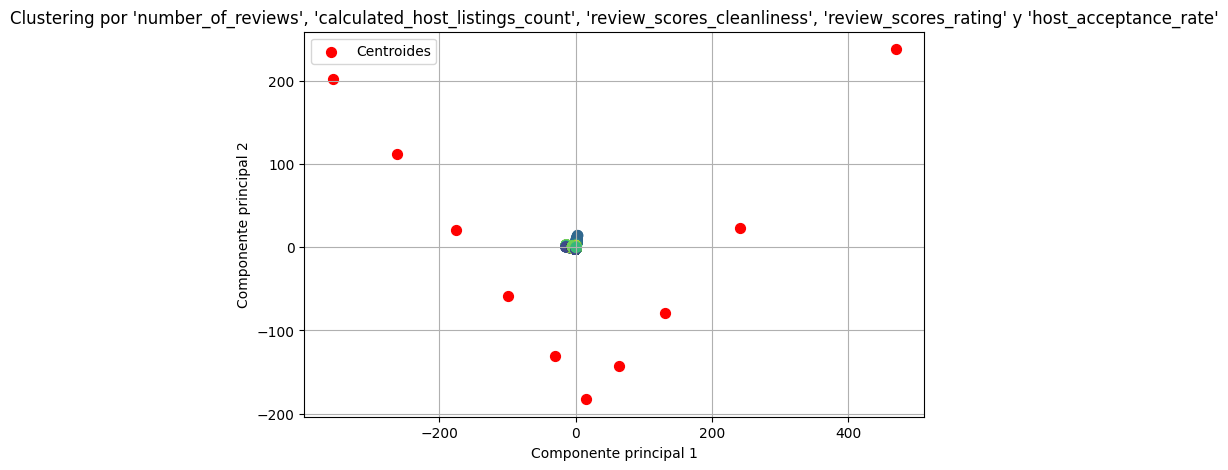

In [30]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por 'number_of_reviews', 'calculated_host_listings_count', 'review_scores_cleanliness', 'review_scores_rating' y 'host_acceptance_rate'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()